In [124]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten,AveragePooling2D
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from pilgs import GrayScale

In [168]:
df1=pd.read_csv("/root/Documents/DATASETS/mnist_sign/sign_mnist_train.csv")
df2=pd.read_csv("/root/Documents/DATASETS/mnist_sign/sign_mnist_test.csv")
print(df1.shape)
df1.head()

(27455, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [202]:
X_train=df1.values[0:,1:]
y_train=df1.values[0:,0]
y_train=to_categorical(y_train)
X_test=df2.values[0:,1:]
y_test=df2.values[0:,0]
y_test=to_categorical(y_test)
X_train=X_train/255
X_test=X_test/255
X_train,X_test=X_train.reshape((-1,28,28,1)),X_test.reshape((-1,28,28,1))

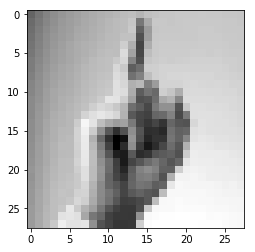

In [170]:
plt.imshow(X_train[0].reshape((28,28)),cmap="gray")

In [188]:

layers=[
    Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),
           activation="relu",padding="same"),
    MaxPool2D(strides=(2,2),pool_size=(2,2)),
    Conv2D(filters=64,kernel_size=(3,3),padding="same",
           activation="relu"),
    MaxPool2D(strides=(2,2),pool_size=(2,2)),
    Conv2D(filters=128,kernel_size=(3,3),padding="same",
           activation="relu"),
    MaxPool2D(strides=(2,2),pool_size=(2,2)),
    Flatten(),
    Dense(units=120,activation="relu"),
    Dense(units=84,activation="relu"),
    Dense(units=25,activation="softmax")
]
model=Sequential(layers)
model.summary()
model.compile(optimizer="adam",loss="categorical_crossentropy",
             metrics=["accuracy"])
h=model.fit(X_train,y_train,epochs=10,batch_size=64)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)             

In [203]:
test_loss,test_acc=model.evaluate(X_test,y_test)

7172/7172 [==============================] - 2s 235us/sample - loss: 0.2309 - accuracy: 0.9543


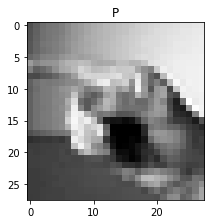

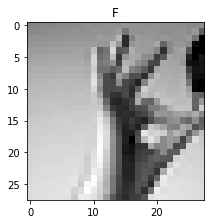

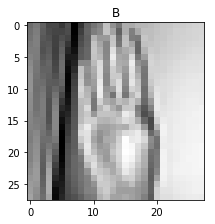

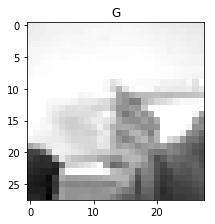

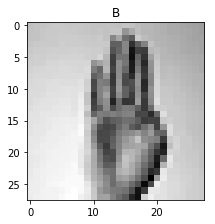

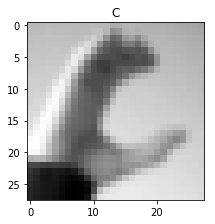

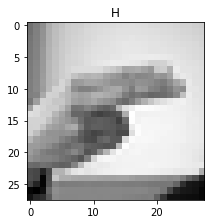

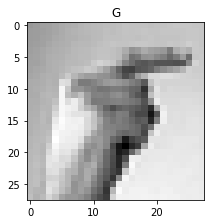

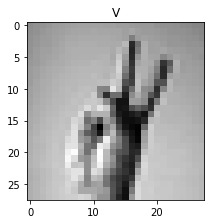

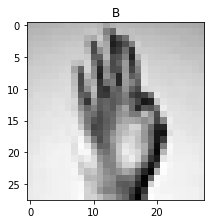

In [195]:
alp="ABCDEFGHIJKLMNOPQRSTUVWXY"
dic={}
for it in range(0,25):
    dic[it]=alp[it]
def imgshow(x,y):
    plt.figure(figsize=[7,7])
    plt.subplot(121)
    curr_img=np.reshape(x,(28,28))
    plt.imshow(curr_img,cmap="gray")
    plt.title(dic[y])
import random as rm
example=X_test.copy()
rm.shuffle(example)
it=rm.choice(range(0,900))
test_ex=example[it:it+10]
pred_ex=model.predict_classes(test_ex)
for x,y in zip(test_ex,pred_ex):
    imgshow(x,y)

In [204]:
from keras.preprocessing.image import load_img
def GrayScale(img):
    img=img.convert("LA")
    img=img.resize((28,28))
    x=img_to_array(img)
    a=[[] for _ in range(0,28)]
    i=0
    for it in x:
        for itm in it:
            a[i].append(itm[0])
        i+=1
    return np.array(a)
a=load_img("/root/Downloads/one.jpg")
b=load_img("/root/Downloads/two.jpg")
a=a.rotate(-90)
b=b.rotate(-90)
#original pics of my fingers

In [205]:
aa=GrayScale(a).reshape((28,28,1))
bb=GrayScale(b).reshape((28,28,1))
X_test=list(X_test)
X_test.append(aa)
X_test.append(bb)
X_test=np.array(X_test)

In [206]:
pred=model.predict_classes(X_test)

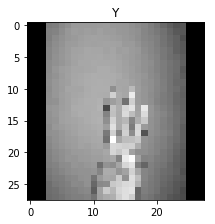

In [207]:
imgshow(X_test[-1],pred[-1])

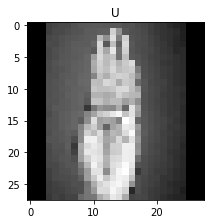

In [208]:
imgshow(X_test[-2],pred[-2])

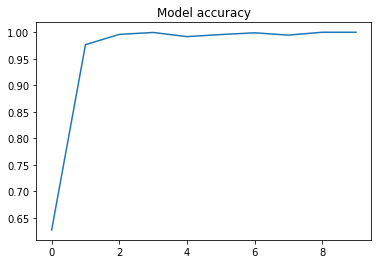

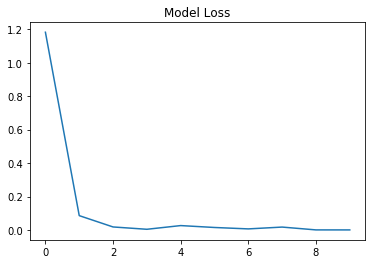

In [209]:
plt.plot(h.history['accuracy'])
plt.title('Model accuracy')
plt.show()

plt.plot(h.history['loss'])
plt.title('Model Loss')
plt.show()